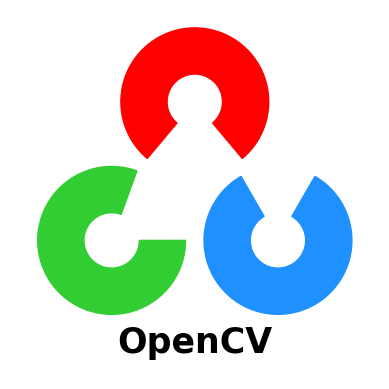

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
#create white img (RGB) 
fig, ax = plt.subplots()
fig.set_facecolor('white')  
ax.set_aspect('equal')
ax.axis('off')  

#wedge is counterclockwise
#draw red wedge
red_wedge = Wedge(center=(0, 1), r=0.8, theta1=310, theta2=230, width=0.5, color='red')
red_hole = Circle((0, 1), 0.1, color='white')
ax.add_patch(red_wedge)
ax.add_patch(red_hole)
#draw green wedge
green_wedge = Wedge(center=(-0.9, -0.5), r=0.8, theta1=70, theta2=360, width=0.5, color='limegreen')
green_hole = Circle((-0.9, -0.5), 0.1, color='white')
ax.add_patch(green_wedge)
ax.add_patch(green_hole)
#draw blue wedge
blue_wedge = Wedge(center=(0.9, -0.5), r=0.8, theta1=120, theta2=60, width=0.5, color='dodgerblue')
blue_hole = Circle((0.9, -0.5), 0.1, color='white')
ax.add_patch(blue_wedge)
ax.add_patch(blue_hole)

#add text
ax.text(0, -1.6, "OpenCV", fontsize=25, ha='center', va='center', fontweight='bold')

plt.xlim(-2, 2) 
plt.ylim(-2, 2)
plt.show()


In [2]:
import cv2
import numpy as np

# read img
img1 = cv2.imread("cat.png").astype(np.float32)
img2 = cv2.imread("img2.png").astype(np.float32)

# make the same size of two imgs
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

alpha = 0.6 
blend = (1 - alpha) * img1 + alpha * img2
# convert to 8-bit 
blend = np.clip(blend, 0, 255).astype(np.uint8)

#display
cv2.imshow("Blended Image", blend)
cv2.imwrite("manual_blend.png", blend)
cv2.waitKey(0)
cv2.destroyAllWindows()



==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



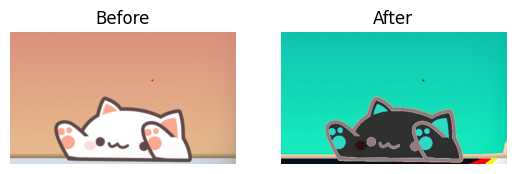


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(img, value):
    return np.clip(img + value, 0, 255).astype(np.uint8)

def adjust_contrast(img, factor):
    return np.clip(img * factor, 0, 255).astype(np.uint8)

def convert_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def add_padding(img, border_type, pad_size):
    border_map = {
        "constant": cv2.BORDER_CONSTANT,
        "reflect": cv2.BORDER_REFLECT,
        "replicate": cv2.BORDER_REPLICATE
    }
    btype = border_map.get(border_type, cv2.BORDER_CONSTANT)
    return cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, btype)

def apply_threshold(img, mode):
    gray = img if len(img.shape) == 2 else convert_grayscale(img)
    thresh_type = cv2.THRESH_BINARY_INV if mode == "inverse" else cv2.THRESH_BINARY
    _, result = cv2.threshold(gray, 127, 255, thresh_type)
    return result

def blend_images(img1, img2, alpha):
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    blend = (1 - alpha) * img1.astype(np.float32) + alpha * img2.astype(np.float32)
    return np.clip(blend, 0, 255).astype(np.uint8)

def display_side_by_side(before, after):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title("Before")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    plt.title("After")
    plt.axis('off')
    plt.show()

def show_menu():
    print("""
==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
""")

def main():
    path = input("Enter image filename: ")
    img = cv2.imread(path)
    if img is None:
        print("Image not found.")
        return

    history = [img.copy()]
    log = ["Loaded image"]

    while True:
        show_menu()
        choice = input("Enter your choice: ")

        if choice == '1':
            val = int(input("Enter brightness value (-100 to 100): "))
            img_new = adjust_brightness(img, val)
            log.append(f"Brightness {val}")

        elif choice == '2':
            factor = float(input("Enter contrast factor (e.g., 1.5): "))
            img_new = adjust_contrast(img, factor)
            log.append(f"Contrast x{factor}")

        elif choice == '3':
            img_new = convert_grayscale(img)
            log.append("Grayscale conversion")

        elif choice == '4':
            btype = input("Enter border type (constant/reflect/replicate): ")
            size = int(input("Enter padding size: "))
            img_new = add_padding(img, btype, size)
            log.append(f"Padding {size}px with {btype}")

        elif choice == '5':
            mode = input("Enter threshold mode (binary/inverse): ")
            img_new = apply_threshold(img, mode)
            log.append(f"Threshold ({mode})")

        elif choice == '6':
            img2_path = input("Enter second image filename: ")
            img2 = cv2.imread(img2_path)
            if img2 is None:
                print("Second image not found.")
                continue
            alpha = float(input("Enter alpha (0-1): "))
            img_new = blend_images(img, img2, alpha)
            log.append(f"Blended with {img2_path}, alpha={alpha}")

        elif choice == '7':
            if len(history) > 1:
                history.pop()
                img = history[-1].copy()
                log.append("Undo last operation")
                continue
            else:
                print("Nothing to undo.")
                continue

        elif choice == '8':
            print("\n--- History ---")
            for entry in log:
                print(entry)
            print("--------------\n")
            continue

        elif choice == '9':
            save_path = input("Enter filename to save (e.g., output.jpg): ")
            cv2.imwrite(save_path, img)
            print("Image saved. Exiting.")
            break

        else:
            print("Invalid choice.")
            continue

        display_side_by_side(img, img_new)
        img = img_new
        history.append(img.copy())

if __name__ == "__main__":
    main()
